In [257]:
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
import seaborn as sns
import pandas as pd

#ye
def check_if_centroid_within_span(X,proposed_centroids):
    
    for c in proposed_centroids:
        if (np.min(X,axis=0)<c).all() and (np.max(X,axis=0)>c).all():
            pass
        else:
            return "BAD"
    return "GOOD"

def getAffillation(X,C,iterate_over = "C"):
    
    lengths = []
    
    if iterate_over == "C":
        for c in C:
            lengths.append(np.sum((X-c)**2,axis=1))
            
        return np.argmin(np.array(lengths), axis=0)
    
    else:
        for x in X:
            lengths.append(np.sum((C-x)**2,axis=1))
        
        return np.argmin(np.array(lengths), axis=1)


def updateCentroids(X,affiliation,num_of_c):

    return np.array([np.mean(X[affiliation==i],axis=0) for i in set(affiliation)])

def KMeans(X,num_of_c = 5,maxFev = 100,animate=True):
    
    dim = np.shape(X)[1]
    
    new_centroids_check = "BAD"

    while new_centroids_check == "BAD":
        proposed_centroids = np.random.randn(num_of_c, dim)*1+np.mean(X,axis=0)
        new_centroids_check = check_if_centroid_within_span(X,proposed_centroids)

    C = proposed_centroids

    if animate:
        fig = plt.figure()
        camera = Camera(fig)
        plt.scatter(X[:,0],X[:,1])
        plt.scatter(C[:,0],C[:,1],s=200,c="r");
        camera.snap()

    for i in range(maxFev):

        affiliation = getAffillation(X,C)

        updated_centroids = updateCentroids(X,affiliation,num_of_c)
        
        C = updated_centroids
        
        if animate:
            plt.scatter(X[:,0],X[:,1],c=affiliation)
            plt.scatter(C[:,0],C[:,1],s=200,c="red");
            camera.snap()


        if i > 0 and (affiliation == last_affiliation).all():
            
            if animate:
                animation = camera.animate()

                animation.save('animation.gif',dpi=500,fps=10)
            return affiliation
        last_affiliation = affiliation


    if animate:
        
        plt.title(i)
        
        animation = camera.animate()

        animation.save('animation.gif',dpi=300,fps=10)
        
    return affiliation

In [258]:
size = 1000
x1 = np.random.rand(size//2,dim)
x2 = np.random.randn(size//2,dim)
X = np.vstack([x1,x2])
aff = KMeans(X,num_of_c = 9,maxFev = 100,animate=False)

## Iris

In [173]:
df = sns.load_dataset("iris")
X_iris = df.values[:,:-1]
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [260]:
mapper = dict(zip(set(df["species"]),range(len(set(df["species"])))))

df["label"] = df.species.apply(lambda x: mapper[x])

In [264]:
affiliation = KMeans(X_iris,maxFev=100,num_of_c=3,animate=False)

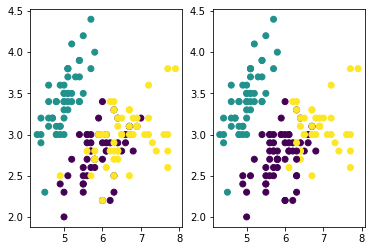

In [265]:
fig, axes = plt.subplots(1,2)

axes[0].scatter(X_iris[:,0],X_iris[:,1],c=df["label"])

axes[1].scatter(X_iris[:,0],X_iris[:,1],c=affiliation)

In [267]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,label
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.322522
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,0.191714
petal_length,0.871754,-0.428440,1.000000,0.962865,0.299793
petal_width,0.817941,-0.366126,0.962865,1.000000,0.376170
label,0.322522,0.191714,0.299793,0.376170,1.000000
